### Abstract

The Online Shoppers Intention dataset includes feature vectors belonging to 12,330 observations. In order not to show any trend towards a certain campaign, special day, user profile or duration, the data set was created in a way that each session belongs to a different user in a 1-year period. The target variable in the dataset is the Revenue variable. Of the 12,330 observations belong to Revenue variable, 84.5% (10,422) have been negative class samples that were completed without shopping, and the rest (1908) have been positive class samples completed with shopping. This report includes a summary and discussion of the results of the study, which included data exploration, data pre-processing, model implementation, and performance evaluation.

### Libraries

In [1]:
#Import the libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

### Reading the Dataset

In [2]:
data = pd.read_csv('Online_Shoppers_Intention.csv') #Read the data

### Some Analysis to Understand the Data

In [3]:
data.head() #Get the first 5 rows  

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.tail() #Get the last 5 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
data.shape  #Check the shape of data

(12330, 18)

In [6]:
data.info() #Get the general information about data such as type of variables, index numbers and missing values   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
data.describe().T #Look for distribution of  numerical variables on data

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


According to feature descriptions, there are 10 numerical variables, 8 categorical variables but the data shows that there are 14 numerical variables and 4 categorical variables. This situation will be checked. Then, some columns will be converted to categorical variables if it is decided that they appear in the data as numeric, although they are actually categorical columns.  

In [8]:
num = data.select_dtypes(exclude=['object', 'bool']).columns #Numerical variables assigned to num object
cat = data.select_dtypes(include=['object','bool']).columns  #Categorical variables assigned to cat object

print('Numeric: ', list(num) , '\n\nCategoric: ', list(cat))  #Print list of numerical variables and categorical variables

Numeric:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'] 

Categoric:  ['Month', 'VisitorType', 'Weekend', 'Revenue']


In [9]:
arr = ['OperatingSystems', 'Browser', 'Region', 'TrafficType'] # These four variables appear to be numeric on the data,  
#but their values are checked because they appear as categorical variables in the data feature description. 

for i in arr:
    print('{} : {}'.format(i, data[i].unique()))

OperatingSystems : [1 2 4 3 7 6 8 5]
Browser : [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region : [1 9 2 3 4 5 6 7 8]
TrafficType : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


In [10]:
for i in arr:
    data[i] = data[i].astype('object') #These four variables are converted into categorical variables.

In [11]:
data.info()  #Get the general information of data to check these four variables' types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12330 non-null object
Region                     12330 non-null object
TrafficType                12330 non-null object
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: b

In [12]:
num = data.select_dtypes(exclude=['object', 'bool']).columns #Numerical variables reassigned to num object since numerical variables updated.
num

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [13]:
print("Total missing values for each column :", data.isna().sum())  #Check for missing values for each column.

Total missing values for each column : Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Exploratory Data Analysis

In this section, we will try to understand more while trying to visualize the data. Firstly, the relations between the numerical data were examined with the correlation analysis. According to the correlation table, while PageValues was the variable with the strongest correlation between numerical data, it was observed that the negatively correlated ExitRates variable was an important variable for Revenue result with a correlation value of -0.207. Then, the relations of the numerical data with the target function are listed from most positive to most negative one. In next steps, there are distributions of 8 categorical variables. For Revenue column, it can be observed that it is unbalanced data. Another standout point is that it is very unlikely that the page is visited and transaction completion on special days while the number of visits and transaction completions is much higher when it is away from special days. Also, a major part of visits ended with transactions belong to weekday.

#### Analysis of Correlation

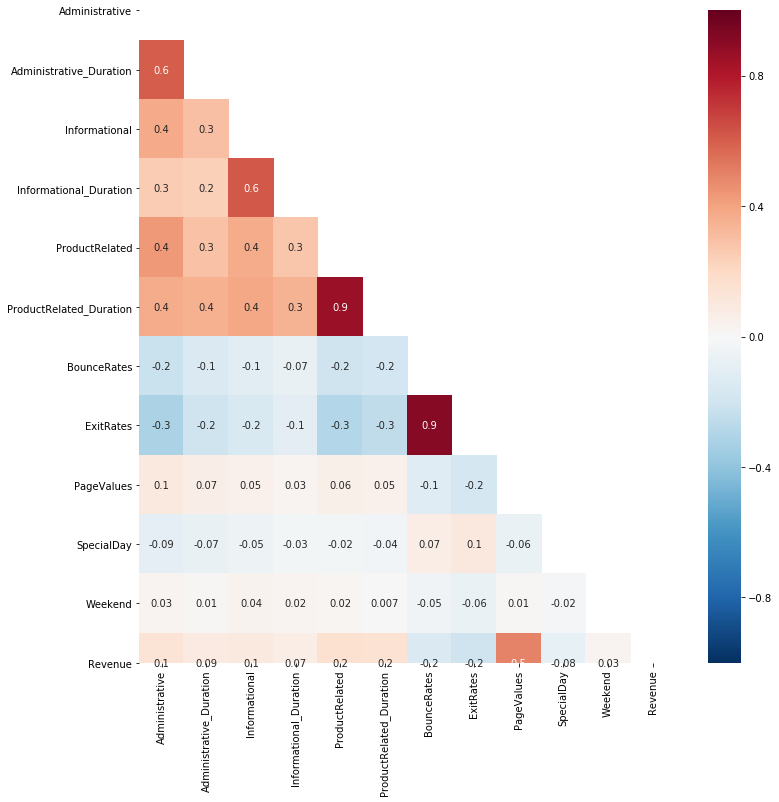

In [14]:
matrix = np.triu(data.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()  #Correlation analysis with specialized heatmap parameters for numerical variables 

In [15]:
data.corr()['Revenue'].sort_values(ascending=False) #Sorting the correlation from the most positive to the most negative according to target column(Revenue)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

#### Analysis of Categorical Values

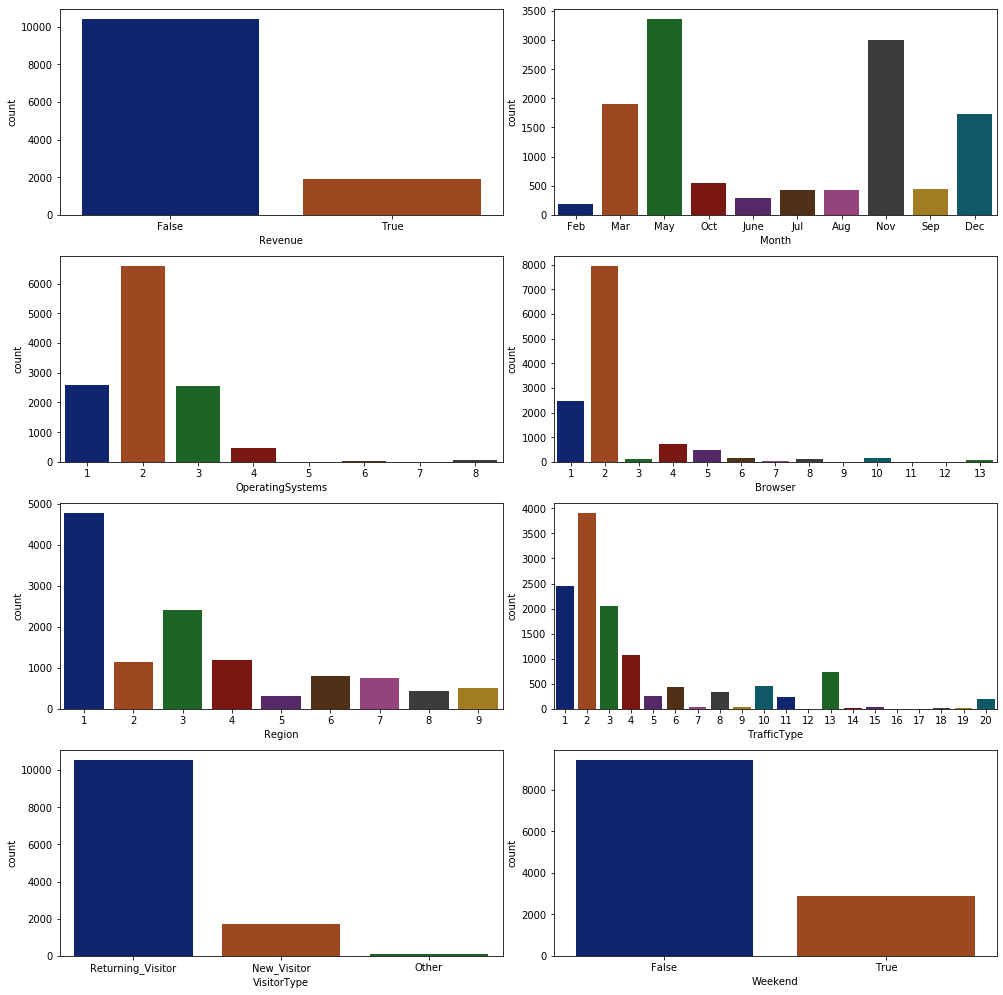

In [16]:
fig, ax = plt.subplots(4,2, figsize=(14,14)) #Create 8 visualizations for (4,2)
fig.tight_layout(pad=2)

sns.countplot(data['Revenue'], palette='dark', ax = ax[0,0])           #The distribution of Revenue column with countplot
sns.countplot(data['Month'], palette='dark', ax = ax[0,1])             #The distribution of Month column with countplot
sns.countplot(data['OperatingSystems'], palette='dark', ax = ax[1,0])  #The distribution of OperatingSystems column with countplot
sns.countplot(data['Browser'], palette='dark', ax = ax[1,1])           #The distribution of Browser column with countplot
sns.countplot(data['Region'], palette='dark', ax = ax[2,0])            #The distribution of Region column with countplot
sns.countplot(data['TrafficType'], palette='dark', ax = ax[2,1])       #The distribution of TrafficType column with countplot
sns.countplot(data['VisitorType'], palette='dark', ax = ax[3,0])       #The distribution of VisitorType column with countplot
sns.countplot(data['Weekend'], palette='dark', ax = ax[3,1])           #The distribution of Weekend column with countplot

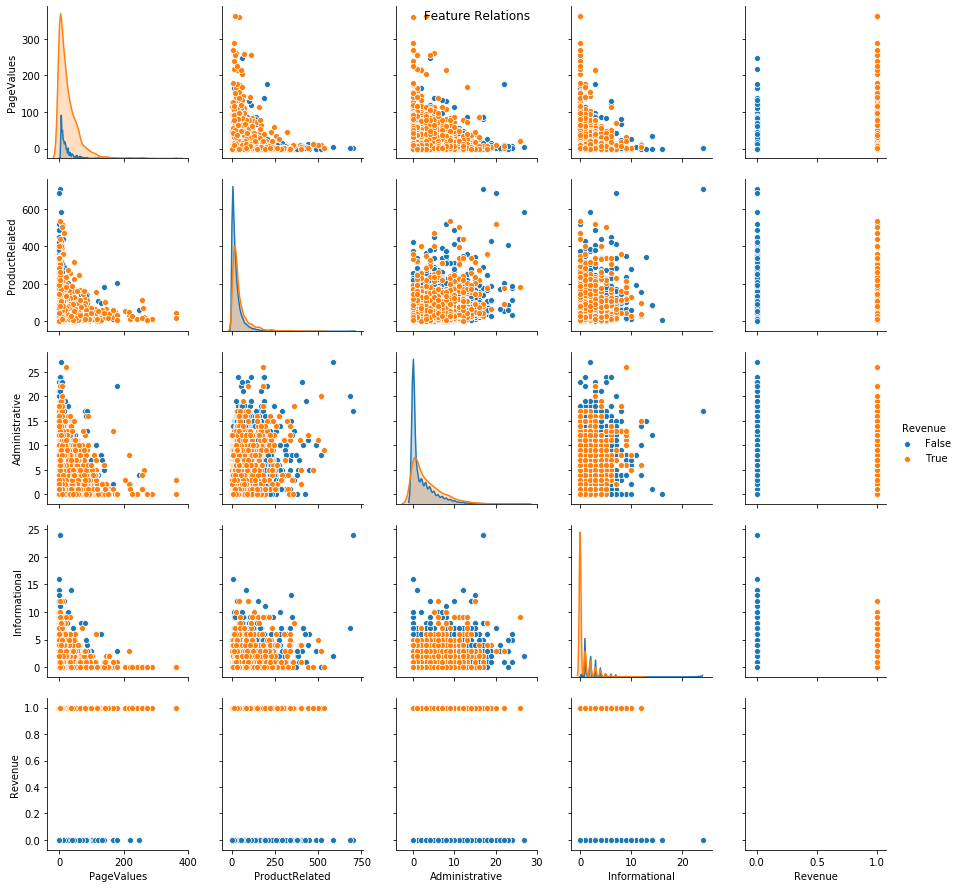

In [17]:
g1 = sns.pairplot(data[['PageValues', 'ProductRelated', 'Administrative', 'Informational', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()  #Show feature relationships with Revenue column which is selected as color coding

#### Analysis of Web Pages

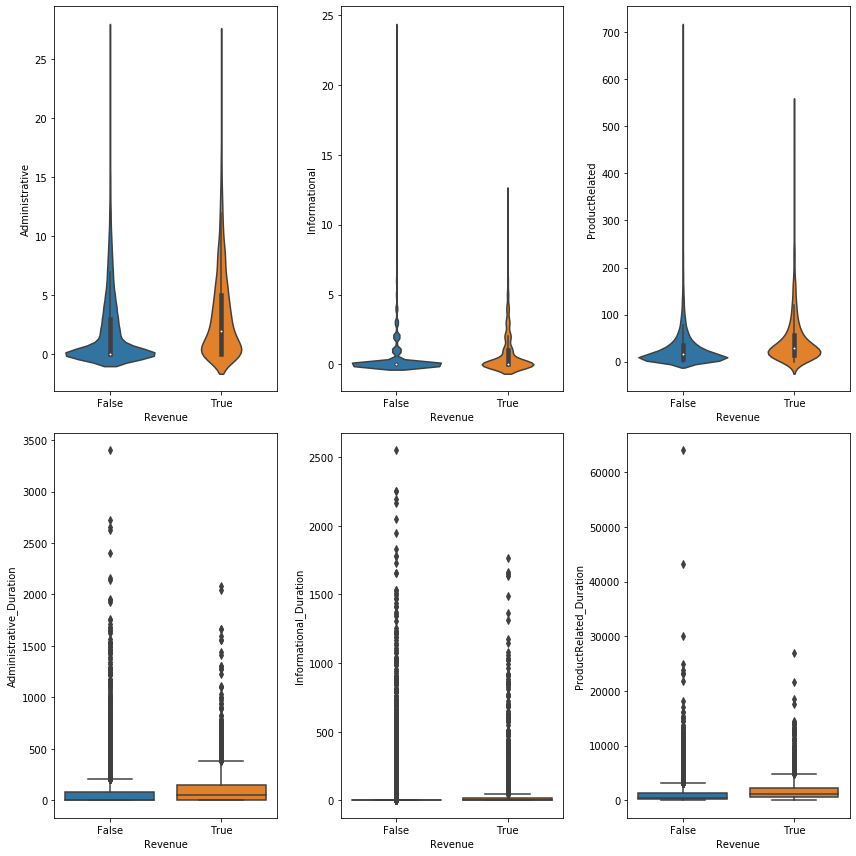

In [18]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)       #Assign Revenue-Administrative relationship thanks to violinplot to the subplot(2, 3, 1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)        #Assign Revenue-Informational relationship thanks to violinplot to the subplot(2, 3, 2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)       #Assign Revenue-ProductRelated relationship thanks to violinplot to the subplot(2, 3, 3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4) #Assign Revenue-Administrative_Duration relationship thanks to boxplot to the subplot(2, 3, 4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)  #Assign Revenue-Informational_Duration relationship thanks to boxplot to the subplot(2, 3, 5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6) #Assign Revenue-ProductRelated_Duration relationship thanks to boxplot to the subplot(2, 3, 6)

plt.tight_layout()
plt.show()    #Show all these 6 graphs

#### Analysis of Page Metrics

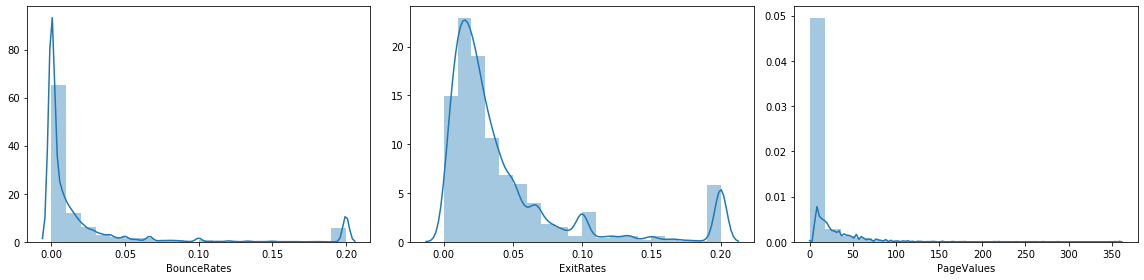

In [19]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(data['BounceRates'], bins=20, ax=ax1) #The distribution of BounceRates column with distplot
sns.distplot(data['ExitRates'], bins=20, ax=ax2)   #The distribution of ExitRates column with distplot
sns.distplot(data['PageValues'], bins=20, ax=ax3)  #The distribution of PageValues column with distplot

plt.tight_layout()
plt.show()   #Show all these 3 graphs

#### Analysis of Visitor

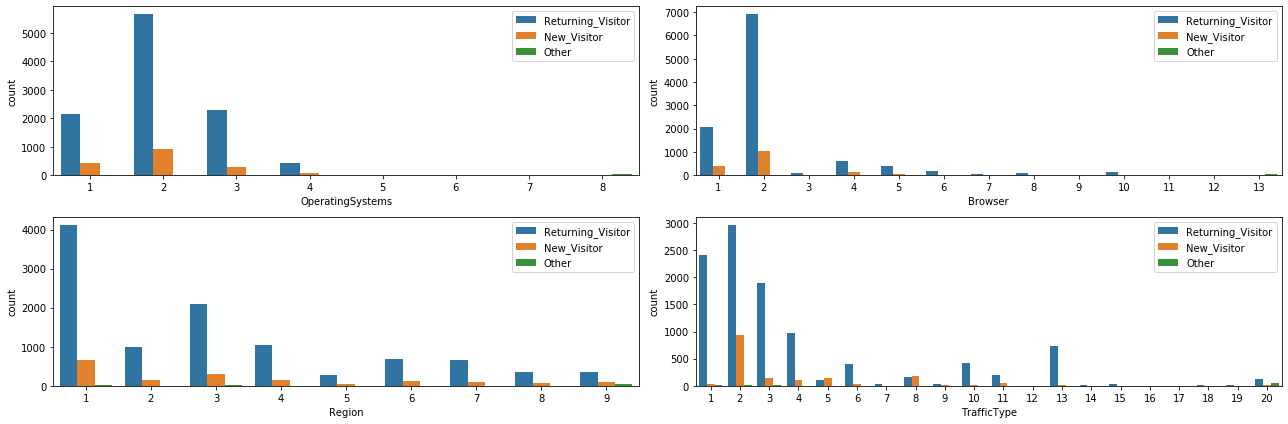

In [20]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=data, x='OperatingSystems', hue='VisitorType', ax=ax1) #Distribution of OperatingSystems according to VisitorType
sns.countplot(data=data, x='Browser', hue='VisitorType', ax=ax2)          #Distribution of Browser according to VisitorType
sns.countplot(data=data, x='Region', hue='VisitorType', ax=ax3)           #Distribution of Region according to VisitorType
sns.countplot(data=data, x='TrafficType', hue='VisitorType', ax=ax4)      #Distribution of TrafficType according to VisitorType

ax1.legend(loc='upper right')   #What the visitor type values correspond to is shown at the upper right for the first graph
ax2.legend(loc='upper right')   #What the visitor type values correspond to is shown at the upper right for the second graph
ax3.legend(loc='upper right')   #What the visitor type values correspond to is shown at the upper right for the third graph
ax4.legend(loc='upper right')   #What the visitor type values correspond to is shown at the upper right for the fourth graph
plt.tight_layout()
plt.show()   #Show all these 4 graphs

#### Analysis of Visit Date

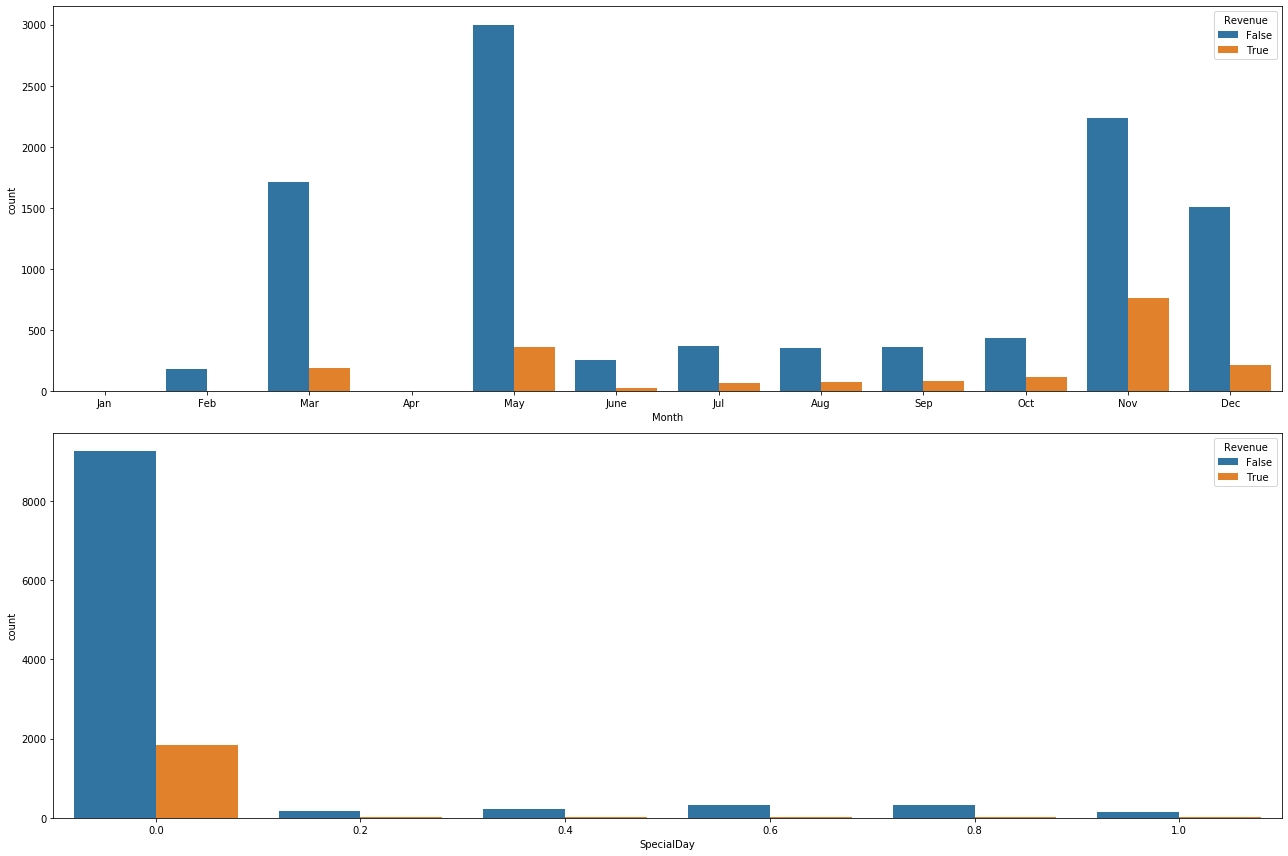

In [21]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data, x='Month', hue='Revenue', ax=ax1, order=orderlist) #Month and Revenue distribution with countplot according to the specified orderlist
sns.countplot(data=data, x='SpecialDay', hue='Revenue', ax=ax2)             #SpecialDay and Revenue distribution with countplot

plt.tight_layout()
plt.show()   #Show all these 2 graphs

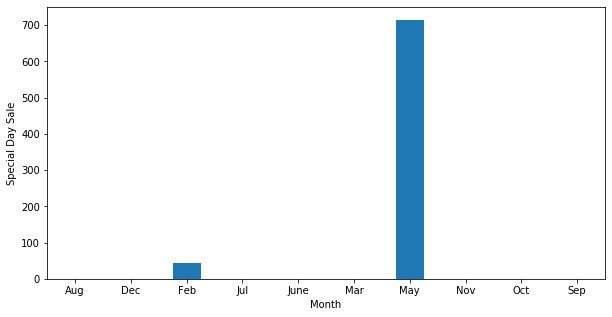

In [22]:
specialDay_data = data.groupby(['Month'])[['SpecialDay']].agg('sum') # The distribution of total SpecialDays sale according to Month
graph = specialDay_data.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data.Month.unique()), rotation=0)
graph.set_xlabel('Month')             #Name for x axis
graph.set_ylabel('Special Day Sale')  #Name for y axis
plt.show()                            #Show bar graph

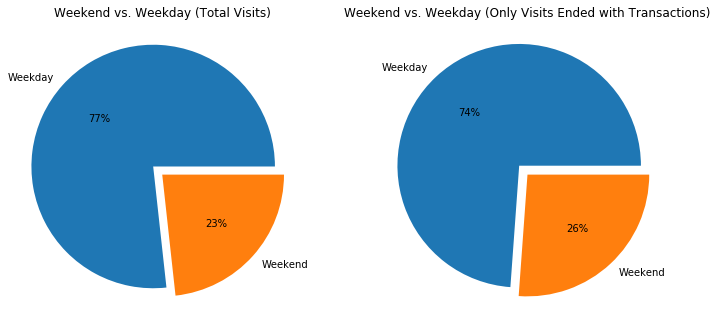

In [23]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%') #Comparison of the count of total weekend values and total weekday values in the pie chart
ax[0].set_title('Weekend vs. Weekday (Total Visits)')   #First 
ax[1].pie(data[data['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
plt.show()

### Data Pre-processing

#### Outlier

In this section, outliers will be checked and for this process, IQR method is chosen. Outlier detection was tried to be performed using the first (0.25) and third (0.75) quartiles with the IQR (Interquartile range) method but any outlier could not be obtained due to the distribution of the data. The third quartile would be increased instead of 0.75, however, not deleting the outlier seemed like a better way to get good results.

In [24]:
data.Administrative.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]) #Check outliers for Administrative column 

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          2.000000
70%          3.000000
80%          4.000000
90%          7.000000
95%          9.000000
99%         14.000000
max         27.000000
Name: Administrative, dtype: float64

In [25]:
q1_adm=np.quantile(data.Administrative,0.25)                                        #Determine Q1
q3_adm=np.quantile(data.Administrative,0.75)                                        #Determine Q1
iqr_adm=q3_adm-q1_adm                                                               #Calculate IQR
low_level = q1_adm-(1.5*iqr_adm)                                                    #Lower bound
up_lowel = q3_adm+(1.5*iqr_adm)                                                     #Upper bound
data1=data[~(data.Administrative<low_level) | (data.Administrative>up_lowel)]       #Try to delete outliers
data1.shape                                                                         #Final data shape

(12330, 18)

In [26]:
data.Administrative_Duration.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) #Check outliers for Administrative_Duration column 

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          7.500000
60%         37.000000
70%         71.200000
80%        121.425000
90%        224.887500
99%        830.587041
max       3398.750000
Name: Administrative_Duration, dtype: float64

In [27]:
q1_adm=np.quantile(data.Administrative_Duration,0.25)                                        #Determine Q1
q3_adm=np.quantile(data.Administrative_Duration,0.75)                                        #Determine Q3
iqr_adm=q3_adm-q1_adm                                                                        #Calculate IQR
low_level = q1_adm-(1.5*iqr_adm)                                                             #Lower bound
up_lowel = q3_adm+(1.5*iqr_adm)                                                              #Upper bound
data1=data[~(data.Administrative_Duration<low_level)|(data.Administrative_Duration>up_lowel)]#Try to delete outliers
data1.shape                                                                                  #Final data shape

(12330, 18)

In [28]:
data.Informational.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) #Check outliers for Informational column 

count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          1.000000
90%          2.000000
99%          6.000000
max         24.000000
Name: Informational, dtype: float64

In [29]:
q1_inf=np.quantile(data.Informational,0.25)                                  #Determine Q1
q3_inf=np.quantile(data.Informational,0.75)                                  #Determine Q3
iqr_inf=q3_inf-q1_inf                                                        #Calculate IQR
low_level = q1_inf-(1.5*iqr_inf)                                             #Lower bound
up_lowel = q3_inf+(1.5*iqr_inf)                                              #Upper bound
data1=data[~(data.Informational<low_level) | (data.Informational>up_lowel)]  #Try to delete outliers
data1.shape                                                                  #Final data shape

(12330, 18)

In [30]:
data.Informational_Duration.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for Informational_Duration column 

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%         72.000000
99%        716.390000
max       2549.375000
Name: Informational_Duration, dtype: float64

In [31]:
q1_inf=np.quantile(data.Informational_Duration,0.25)                                            #Determine Q1
q3_inf=np.quantile(data.Informational_Duration,0.75)                                            #Determine Q3
iqr_inf=q3_inf-q1_inf                                                                           #Calculate IQR
low_level = q1_inf-(1.5*iqr_inf)                                                                #Lower bound
up_lowel = q3_inf+(1.5*iqr_inf)                                                                 #Upper bound
data1=data[~(data.Informational_Duration<low_level) | (data.Informational_Duration>up_lowel)]   #Try to delete outliers
data1.shape                                                                                     #Final data shape

(12330, 18)

In [32]:
data.ProductRelated.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for ProductRelated column 

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
1%           1.000000
10%          3.000000
20%          6.000000
30%          9.000000
40%         13.000000
50%         18.000000
60%         24.000000
70%         32.000000
80%         45.000000
90%         74.000000
99%        221.000000
max        705.000000
Name: ProductRelated, dtype: float64

In [33]:
q1_prd=np.quantile(data.ProductRelated,0.25)                                            #Determine Q1
q3_prd=np.quantile(data.ProductRelated,0.75)                                            #Determine Q3
iqr_prd=q3_prd-q1_prd                                                                   #Calculate IQR
low_level = q1_prd-(1.5*iqr_prd)                                                        #Lower bound
up_lowel = q3_prd+(1.5*iqr_prd)                                                         #Upper bound
data1=data[~(data.ProductRelated<low_level) | (data.ProductRelated>up_lowel)]           #Try to delete outliers
data1.shape                                                                             #Final data shape

(12330, 18)

In [34]:
data.ProductRelated_Duration.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for ProductRelated_Duration column 

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
1%           0.000000
10%         36.000000
20%        129.000000
30%        246.980000
40%        402.117216
50%        598.936905
60%        852.000000
70%       1227.014167
80%       1775.928667
90%       2877.863333
99%       8701.142697
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

In [35]:
q1_prd=np.quantile(data.ProductRelated_Duration,0.25)                                            #Determine Q1
q3_prd=np.quantile(data.ProductRelated_Duration,0.75)                                            #Determine Q3
iqr_prd=q3_prd-q1_prd                                                                            #Calculate IQR
low_level = q1_prd-(1.5*iqr_prd)                                                                 #Lower bound
up_lowel = q3_prd+(1.5*iqr_prd)                                                                  #Upper bound
data1=data[~(data.ProductRelated_Duration<low_level) | (data.ProductRelated_Duration>up_lowel)]  #Try to delete outliers
data1.shape                                                                                      #Final data shape

(12330, 18)

In [36]:
data.BounceRates.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for BounceRates column

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.003112
60%          0.007143
70%          0.012859
80%          0.023077
90%          0.058197
99%          0.200000
max          0.200000
Name: BounceRates, dtype: float64

In [37]:
#Outlier for Bounce_Rates
q1_br=np.quantile(data.BounceRates,0.25)                                            #Determine Q1
q3_br=np.quantile(data.BounceRates,0.75)                                            #Determine Q3
iqr_br=q3_br-q1_br                                                                  #Calculate IQR
low_level = q1_br-(1.5*iqr_br)                                                      #Lower bound
up_lowel = q3_br+(1.5*iqr_br)                                                       #Upper bound
data1=data[~(data.BounceRates<low_level) | (data.BounceRates>up_lowel)]             #Try to delete outliers
data1.shape                                                                         #Final data shape

(12330, 18)

In [38]:
data.ExitRates.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for ExitRates column

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
1%           0.001250
10%          0.007449
20%          0.012071
30%          0.016216
40%          0.020513
50%          0.025156
60%          0.032871
70%          0.041270
80%          0.058333
90%          0.100000
99%          0.200000
max          0.200000
Name: ExitRates, dtype: float64

In [39]:
#Outlier for Exit_Rates
q1_er=np.quantile(data.ExitRates,0.25)                                       #Determine Q1
q3_er=np.quantile(data.ExitRates,0.75)                                       #Determine Q1
iqr_er=q3_er-q1_er                                                           #Calculate IQR
low_level = q1_er-(1.5*iqr_er)                                               #Lower bound
up_lowel = q3_er+(1.5*iqr_er)                                                #Upper bound
data1=data[~(data.ExitRates<low_level) | (data.ExitRates>up_lowel)]          #Try to delete outliers    
data1.shape                                                                  #Final data shape

(12330, 18)

In [40]:
data.PageValues.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for PageValues column

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          3.060078
90%         18.855502
99%         85.498490
max        361.763742
Name: PageValues, dtype: float64

In [41]:
#Outlier for PageValues
q1_pg=np.quantile(data.PageValues,0.25)                                         #Determine Q1
q3_pg=np.quantile(data.PageValues,0.75)                                         #Determine Q1
iqr_pg=q3_inf-q1_pg                                                             #Calculate IQR
low_level = q1_pg-(1.5*iqr_pg)                                                  #Lower bound
up_lowel = q3_pg+(1.5*iqr_pg)                                                   #Upper bound
data1=data[~(data.PageValues<low_level) | (data.PageValues>up_lowel)]           #Try to delete outliers
data1.shape                                                                     #Final data shape

(12330, 18)

In [42]:
data.SpecialDay.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])   #Check outliers for SpecialDay column

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.200000
99%          1.000000
max          1.000000
Name: SpecialDay, dtype: float64

#### One Hot Encoding

The categorical values must be converted into numbers. This is needed for both input and output variables that are categorical. For this resaon, One Hot Encoding is applied to categorical variables because it represents categorical data more expressive on this data. Also, these categorical variables does not include any ordinal situation. While applying One Hot encoding, in order to avoid the curse of dimensionality, one of the newly formed variables was deleted for each main categorical variable. From now on, new target feature is Revenue_True and the number of input variables is 68.

In [43]:
#Assigning numeric variables to num_cols
num_cols = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
            'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'] 
#Assigning categoric variables to cat_cols
cat_cols = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'] 

In [44]:
data1 = pd.get_dummies(data, columns = cat_cols, drop_first = True) #Applying one hot encoding

In [45]:
data1.head()   #Check the last version of data, there are 69 variables thanks to one hot encoding

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


#### Feature Selection

Too many features do not always give the best results, and the time it takes to finalize the model is costly and valuable. For this reason, getting rid of some features can yield useful results if good estimation can be performed. Thanks to correlation analysis, it is observed the relationship of variables with Revenue_True target column. For feature selection, it is determined to delete variables with a threshold value less than 5% from the model. Next, for categorical vairables, thanks to the Chi2 metric, important features will be determined by deleting the variables with a score below 10, among the variables obtained by encoding categorical variables. Later, these two variable lists will be concated and used for modelling.

In [46]:
data1.corr()['Revenue_True'].abs().sort_values(ascending=False).head(25) #Observing the 25 most influential variables even some of them have negative correlation

Revenue_True                     1.000000
PageValues                       0.492569
ExitRates                        0.207071
ProductRelated                   0.158538
Month_Nov                        0.154774
ProductRelated_Duration          0.152373
BounceRates                      0.150673
Administrative                   0.138917
TrafficType_2                    0.116347
VisitorType_Returning_Visitor    0.103843
Informational                    0.095200
Administrative_Duration          0.093587
TrafficType_3                    0.082808
SpecialDay                       0.082305
Month_May                        0.078320
OperatingSystems_3               0.070472
Informational_Duration           0.070345
TrafficType_13                   0.067310
Month_Mar                        0.063941
OperatingSystems_2               0.060040
TrafficType_8                    0.057167
Month_Feb                        0.047114
TrafficType_20                   0.034540
Month_Dec                        0

In [47]:
corr_feature_names = pd.DataFrame(list(data1.corr()['Revenue_True'].abs().sort_values(ascending=False).head(22).index)) 
#assign the 22 most influential variables according to correlation to corr_feature_names object

In [48]:
corr_feature_names = corr_feature_names[1:21]  #Exclude target column from corr_feature_names object
corr_feature_names                             #See what is new corr_feature_names

,0
1,PageValues
2,ExitRates
3,ProductRelated
4,Month_Nov
5,ProductRelated_Duration
6,BounceRates
7,Administrative
8,TrafficType_2
9,VisitorType_Returning_Visitor
10,Informational


#### Splitting & Scaling

In this section, data is splitted to X and y. Then, with Chi2 metric, influential variables selected for feature selection. (For Chi2 metric, data should be splitted y and categorical X columns.) Next, Standard scaling is applied to numerical variables.

In [49]:
y = data1['Revenue_True'].copy()           #Assigning target column to y 
X = data1.drop('Revenue_True', axis = 1)   #X is data without target column

In [50]:
X.columns   #Get the X columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_

In [51]:
X_cat = X[['Month_Dec','Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17',
       'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True']]  #Assigning variables generated thanks to one hot encoding to X_cat object
X_cat   #Observe X_cat 

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12326,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12327,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12328,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Feature selection With Chi2

In [52]:
#Selecting the most influential 14 features from categorical variables thanks to chi2 and select K best.

bestFeatures = SelectKBest(score_func=chi2, k = 25)              #According to Chi2, show best 25 feature
fit = bestFeatures.fit(X_cat,y)                                  #Fit this metric with X_cat and y 
datascores = pd.DataFrame(fit.scores_)                           #Fit scores
datacolumns = pd.DataFrame(X_cat.columns)                        #Define columns
featureScores = pd.concat([datacolumns,datascores], axis = 1)    #Concat variables and their scores 
featureScores.columns = ['Variables','Scores']                   #Define headings for variables
print(featureScores.nlargest(25,'Scores'))                       #Show the best 25 features according to their scores

                        Variables      Scores
6                       Month_Nov  223.548231
36                  TrafficType_2  113.937321
37                  TrafficType_3   70.477528
5                       Month_May   54.997108
47                 TrafficType_13   52.519206
10             OperatingSystems_3   48.546233
4                       Month_Mar   42.613274
42                  TrafficType_8   39.174150
1                       Month_Feb   26.961176
9              OperatingSystems_2   20.651600
56  VisitorType_Returning_Visitor   19.183544
54                 TrafficType_20   14.473329
7                       Month_Oct   12.571184
0                       Month_Dec   11.624839
17                      Browser_3    9.212374
57                   Weekend_True    8.120464
39                  TrafficType_5    7.309535
44                 TrafficType_10    7.046143
49                 TrafficType_15    6.956822
41                  TrafficType_7    6.452407
3                      Month_June 

In [53]:
chi_best_variables = pd.DataFrame(list(featureScores.nlargest(14,'Scores').Variables)) #There are 14 features because threshold is defined 10.0 as scores.

In [54]:
#Concating most influential variables according to Correlation metric and most influential variables according to Chi Square metric
data2 = pd.concat([corr_feature_names,chi_best_variables],ignore_index = True, verify_integrity = True) 

In [55]:
data2[0].unique() #After the concatination, there are these unique variables.

array(['PageValues', 'ExitRates', 'ProductRelated', 'Month_Nov',
       'ProductRelated_Duration', 'BounceRates', 'Administrative',
       'TrafficType_2', 'VisitorType_Returning_Visitor', 'Informational',
       'Administrative_Duration', 'TrafficType_3', 'SpecialDay',
       'Month_May', 'OperatingSystems_3', 'Informational_Duration',
       'TrafficType_13', 'Month_Mar', 'OperatingSystems_2',
       'TrafficType_8', 'Month_Feb', 'TrafficType_20', 'Month_Oct',
       'Month_Dec'], dtype=object)

In [56]:
X_columns = data2[0].unique() #Assigning these variables to X_columns

In [57]:
X_columns   #See X_columns

array(['PageValues', 'ExitRates', 'ProductRelated', 'Month_Nov',
       'ProductRelated_Duration', 'BounceRates', 'Administrative',
       'TrafficType_2', 'VisitorType_Returning_Visitor', 'Informational',
       'Administrative_Duration', 'TrafficType_3', 'SpecialDay',
       'Month_May', 'OperatingSystems_3', 'Informational_Duration',
       'TrafficType_13', 'Month_Mar', 'OperatingSystems_2',
       'TrafficType_8', 'Month_Feb', 'TrafficType_20', 'Month_Oct',
       'Month_Dec'], dtype=object)

In [58]:
X = X[X_columns]   #From now on, X will consist of only X_columns variables 
X                  #See what is x

,PageValues,ExitRates,ProductRelated,Month_Nov,ProductRelated_Duration,BounceRates,Administrative,TrafficType_2,VisitorType_Returning_Visitor,Informational,...,OperatingSystems_3,Informational_Duration,TrafficType_13,Month_Mar,OperatingSystems_2,TrafficType_8,Month_Feb,TrafficType_20,Month_Oct,Month_Dec
0,0.000000,0.200000,1,0,0.000000,0.200000,0,0,1,0,...,0,0.0,0,0,0,0,1,0,0,0
1,0.000000,0.100000,2,0,64.000000,0.000000,0,1,1,0,...,0,0.0,0,0,1,0,1,0,0,0
2,0.000000,0.200000,1,0,0.000000,0.200000,0,0,1,0,...,0,0.0,0,0,0,0,1,0,0,0
3,0.000000,0.140000,2,0,2.666667,0.050000,0,0,1,0,...,1,0.0,0,0,0,0,1,0,0,0
4,0.000000,0.050000,10,0,627.500000,0.020000,0,0,1,0,...,1,0.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12.241717,0.029031,53,0,1783.791667,0.007143,3,0,1,0,...,0,0.0,0,0,0,0,0,0,0,1
12326,0.000000,0.021333,5,1,465.750000,0.000000,0,0,1,0,...,1,0.0,0,0,0,1,0,0,0,0
12327,0.000000,0.086667,6,1,184.250000,0.083333,0,0,1,0,...,1,0.0,1,0,0,0,0,0,0,0
12328,0.000000,0.021053,15,1,346.000000,0.000000,4,0,1,0,...,0,0.0,0,0,1,0,0,0,0,0


In [59]:
feature_names = list(X.columns) #Keep the columns of X for use in next steps such as feature importance
feature_names                   #See what is feature_names

['PageValues',
 'ExitRates',
 'ProductRelated',
 'Month_Nov',
 'ProductRelated_Duration',
 'BounceRates',
 'Administrative',
 'TrafficType_2',
 'VisitorType_Returning_Visitor',
 'Informational',
 'Administrative_Duration',
 'TrafficType_3',
 'SpecialDay',
 'Month_May',
 'OperatingSystems_3',
 'Informational_Duration',
 'TrafficType_13',
 'Month_Mar',
 'OperatingSystems_2',
 'TrafficType_8',
 'Month_Feb',
 'TrafficType_20',
 'Month_Oct',
 'Month_Dec']

In [60]:
scaler = StandardScaler()                           #Standard Scaler is selected to scale data
X[num] = scaler.fit_transform(X[num].to_numpy())    #Applying standard scale to numerical variables

In [61]:
X.head()   #Get the X after scaling process

,PageValues,ExitRates,ProductRelated,Month_Nov,ProductRelated_Duration,BounceRates,Administrative,TrafficType_2,VisitorType_Returning_Visitor,Informational,...,OperatingSystems_3,Informational_Duration,TrafficType_13,Month_Mar,OperatingSystems_2,TrafficType_8,Month_Feb,TrafficType_20,Month_Oct,Month_Dec
0,-0.317178,3.229316,-0.691003,0,-0.624348,3.667189,-0.696993,0,1,-0.396478,...,0,-0.244931,0,0,0,0,1,0,0,0
1,-0.317178,1.171473,-0.668518,0,-0.590903,-0.457683,-0.696993,1,1,-0.396478,...,0,-0.244931,0,0,1,0,1,0,0,0
2,-0.317178,3.229316,-0.691003,0,-0.624348,3.667189,-0.696993,0,1,-0.396478,...,0,-0.244931,0,0,0,0,1,0,0,0
3,-0.317178,1.994610,-0.668518,0,-0.622954,0.573535,-0.696993,0,1,-0.396478,...,1,-0.244931,0,0,0,0,1,0,0,0
4,-0.317178,0.142551,-0.488636,0,-0.296430,-0.045196,-0.696993,0,1,-0.396478,...,1,-0.244931,0,0,0,0,1,0,0,0


In [62]:
#Split X and y as X_train, X_test and y_train, y_test. Test size is also defined as 0.25
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42) 
X_train

,PageValues,ExitRates,ProductRelated,Month_Nov,ProductRelated_Duration,BounceRates,Administrative,TrafficType_2,VisitorType_Returning_Visitor,Informational,...,OperatingSystems_3,Informational_Duration,TrafficType_13,Month_Mar,OperatingSystems_2,TrafficType_8,Month_Feb,TrafficType_20,Month_Oct,Month_Dec
10385,3.872983,-0.780840,0.051008,0,-0.161093,-0.457683,1.410394,1,0,1.965532,...,0,1.518323,0,0,1,0,0,0,0,1
8823,-0.317178,0.142551,-0.623548,1,-0.596324,-0.457683,-0.696993,0,1,-0.396478,...,1,-0.244931,0,0,0,0,0,0,0,0
5298,-0.317178,0.142551,-0.668518,0,-0.561116,-0.457683,-0.696993,0,1,-0.396478,...,1,-0.244931,0,0,0,0,0,0,0,0
10187,-0.317178,-0.078477,-0.331240,1,-0.524688,0.000636,-0.696993,0,1,1.178195,...,1,-0.095723,1,0,0,0,0,0,0,0
11018,-0.317178,-0.512217,-0.466151,1,-0.547790,-0.082695,-0.696993,1,0,-0.396478,...,0,-0.244931,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.317178,-0.563790,-0.151358,1,-0.241641,-0.457683,3.517781,1,1,-0.396478,...,1,-0.244931,0,0,0,0,0,0,0,0
5191,0.942430,-0.569779,-0.398696,0,-0.446671,-0.457683,-0.696993,0,1,-0.396478,...,0,-0.244931,0,0,1,0,0,0,0,0
5390,-0.317178,0.485525,-0.646033,0,-0.525580,-0.457683,-0.696993,0,1,-0.396478,...,0,-0.244931,0,0,1,0,0,0,0,0
860,-0.317178,-0.543397,-0.421181,0,-0.464961,-0.457683,-0.696993,1,0,-0.396478,...,0,-0.244931,0,1,0,0,0,0,0,0


##### SMOTE

We create new examples for our minority class by generating synthetic data with SMOTE(Synthetic Minority Oversampling Technique). We are trying to solve the uneven distribution with SMOTE.

In [63]:
#SMOTE(Synthetic Minority Oversampling Technique)
def smotify(X_train, y_train):               #Define smotify function based train data
  smt = SMOTE()                              #Call SMOTE as smt
  return smt.fit_sample(X_train, y_train)    #Return as fitted smt for train data

In [64]:
unique, count = np.unique(y_train, return_counts=True) #There is 2 unique value which are 7818 times 0 and 1419 times 1 on y_train.
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)} #Assign a dictionary which represents unique values their counts to y_train_dict_value_count
y_train_dict_value_count   #Get the keys and values of y_train_dict_value_count

{0: 7828, 1: 1419}

In [65]:
sm = SMOTE(random_state=12,sampling_strategy =1)   #Obtaining synthetic samples for train data thanks to SMOTE
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [66]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count   #Thanks to the SMOTE method, 1 as much as 0 was obtained in total (7828).

{0: 7828, 1: 7828}

### MODELING

Many models were tried in the modeling part, but considering the success levels in model evaluation measurements and the fact that time is a cost, Random Forest Classifier, LightGBM Classifier and AdaBoost Classifier models were preferred. Although more successful model results were obtained (e.g., the waiting time for XGBoost, the winning model of many of the competitions in Kaggle (4 hours 2 minutes), was approximately 10 times longer than the waiting time of the AdaBoost model (23 minutes)), but the success level was not very different. Also, the success metrics of some models, such as the KNN Classifier, dropped after the SMOTE process was included in the notebook. In addition, generally ensemble learning models were chosen because in this dataset they accurately reflect the general belief that ensemble learning models are less affected by outliers. 

#### RANDOM FOREST

In [67]:
rf_model = RandomForestClassifier()   #Set the Random Forest Classifier model

In [68]:
rf_model.fit(X_train_res, y_train_res)   #Fit Random Forest model
y_pred = rf_model.predict(X_test)        #Predict y values according to X_test

In [69]:
accuracy = accuracy_score(y_test, y_pred)                 #Calculation of accuracy score for y_test and y_pred
recall = recall_score(y_test,y_pred)                      #Calculation of recall score for y_test and y_pred
precision = precision_score(y_test,y_pred)                #Calculation of precision score for y_test and y_pred
f1_score = 2*(recall*precision) / (recall + precision)    #Calculation of f1 score according to formulation which consists of recall and precision

print("-"*28)                                             #Create a line with -
print("Random Forest:" )                                  #Print Random Forest:
print("-"*28)                                             #Create a line with -
print("\nAccuracy: {:.4%}".format(accuracy))              #Print Accuracy score: accuracy_score
print('\n','Recall : '+str(recall))                       #Print Recall score: recall_score
print('\n','Precision : '+str(precision))                 #Print Precision: precision_score
print('\n','F1 Score : '+str(f1_score))                   #Print F1 Score: f1_score

----------------------------
Random Forest:
----------------------------

Accuracy: 88.3879%

 Recall : 0.7382413087934561

 Precision : 0.61082910321489

 F1 Score : 0.6685185185185185


In [70]:
print(classification_report(y_test, y_pred))   #Get classification report according to y_test and y_pred

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2594
           1       0.61      0.74      0.67       489

    accuracy                           0.88      3083
   macro avg       0.78      0.82      0.80      3083
weighted avg       0.90      0.88      0.89      3083



##### Random Forest Feature Importance

In [71]:
features = pd.DataFrame(X_train).columns     #Get the X_train columns as features  
importances = rf_model.feature_importances_  #Assign feature importance values to importances
indices = np.argsort(importances)            #Sort features according to their importances values 

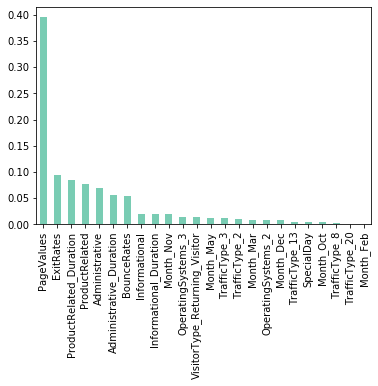

In [72]:
feat_importances = pd.Series(importances, index=feature_names)   #Get feature importances with indexes as feat_importances
feat_importances.nlargest(24).plot(kind='bar',color = '#79CCB3') #Plot 24 features' importances as bar chart

##### Random Forest Tuning

In [73]:
rf_params = {"max_depth": [2,5,8,10],       #The maximum depth of the tree 
            "max_features": [2,5,8],        #The number of features to consider when looking for the best split
            "n_estimators": [100,500,1000], #The number of trees in the forest
            "min_samples_split": [2,5,10]}  #The minimum number of samples required to split an internal node

In [74]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,    #Applying cross validation to the model
                           rf_params,   #Search best result in given parameters
                           cv = 10,     #Perform 10-Fold cross validation
                           n_jobs = -1, #n_jobs = 1 means using all processors
                           verbose = 2) #Controls the verbosity: the higher, the more messages

In [75]:
rf_cv_model.fit(X_train_res, y_train_res)  #Fit model with cross validation

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [76]:
print("The best parameters: " + str(rf_cv_model.best_params_))  #Print best parameters on given parameters

The best parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [77]:
#Tune the model with the best parameters
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(X_train_res, y_train_res)  #Fit the model with best parameters

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=500)

In [78]:
y_pred = rf_tuned.predict(X_test) #Prediction according to tuned model
accuracy_score(y_test, y_pred)    #Accuracy score acording to tuned model

0.8770677911125527

#### LIGHTGBM

In [79]:
lgbm_model = LGBMClassifier().fit(X_train_res, y_train_res) #Set and fit Light GBM Classifier model
y_pred = lgbm_model.predict(X_test)                         #Predict y values according to X_test

In [80]:
accuracy = accuracy_score(y_test, y_pred)                 #Calculation of accuracy score for y_test and y_pred
recall = recall_score(y_test,y_pred)                      #Calculation of recall score for y_test and y_pred
precision = precision_score(y_test,y_pred)                #Calculation of precision score for y_test and y_pred
f1_score = 2*(recall*precision) / (recall + precision)    #Calculation of f1 score according to formulation which consists of recall and precision

print("-"*28)                                             #Create a line with -
print("LightGBM:" )                                       #Print LightGBM:
print("-"*28)                                             #Create a line with -
print("\nAccuracy: {:.4%}".format(accuracy))              #Print Accuracy Score: accuracy_score
print('\n','Recall : '+str(recall))                       #Print Recall Score: recall_score
print('\n','Precision : '+str(precision))                 #Print Precision Score: precision_score
print('\n','F1 Score : '+str(f1_score))                   #Print F1 Score: f1_score

----------------------------
LightGBM:
----------------------------

Accuracy: 88.0636%

 Recall : 0.7177914110429447

 Precision : 0.6041308089500861

 F1 Score : 0.6560747663551403


In [81]:
print(classification_report(y_test, y_pred))   #Get classification report according to y_test and y_pred

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2594
           1       0.60      0.72      0.66       489

    accuracy                           0.88      3083
   macro avg       0.77      0.81      0.79      3083
weighted avg       0.89      0.88      0.88      3083



##### LightGBM Feature Importance

In [82]:
features = pd.DataFrame(X_train).columns      #Get the X_train columns as features 
importances = lgbm_model.feature_importances_ #Assign feature importance values to importances
indices = np.argsort(importances)             #Sort features according to their importances values 

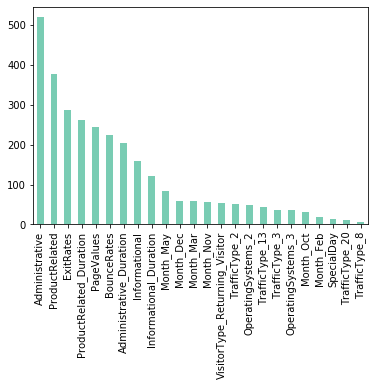

In [83]:
feat_importances = pd.Series(importances, index=feature_names)     #Get feature importances with indexes as feat_importances
feat_importances.nlargest(24).plot(kind='bar',color = '#79CCB3')   #Plot 24 features' importances as bar chart

##### LightGBM Tuning

In [84]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000], #Number of boosted trees to fit.
        'subsample': [0.6, 0.8, 1.0],           #Subsample ratio of the training instance
        'max_depth': [3, 4, 5,6],               #Maximum tree depth for base learners
        'learning_rate': [0.1,0.01,0.02,0.05],  #Boosting learning rate
        "min_child_samples": [5,10,20]}         #Minimum number of data needed in a child (leaf)

In [85]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm,             #Applying cross validation to the model
                             lgbm_params,      #Search best result in given parameters
                             cv = 10,          #Perform 10-Fold cross validation
                             n_jobs = -1,      #n_jobs = 1 means using all processors
                             verbose = 2)      #Controls the verbosity: the higher, the more messages

In [86]:
lgbm_cv_model.fit(X_train_res, y_train_res)    #Fit model with cross validation
lgbm_cv_model.best_params_                     #Show the best result on given parameters

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


{'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_samples': 5,
 'n_estimators': 2000,
 'subsample': 0.6}

In [87]:
#Tune the model with the best parameters
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 1000,
                       min_child_samples = 10)

In [88]:
lgbm_tuned = lgbm.fit(X_train,y_train)  #Fit the model with best parameters
y_pred = lgbm_tuned.predict(X_test)     #Prediction according to tuned model
accuracy_score(y_test, y_pred)          #Accuracy score acording to tuned model

0.8965293545248135

#### ADABOOST

In [89]:
ab_model = AdaBoostClassifier()        #Set the Random Forest Classifier model
ab_model.fit(X_train_res,y_train_res)  #Fit LightGBM model
y_pred = ab_model.predict(X_test)      #Predict y values according to X_test

In [90]:
accuracy = accuracy_score(y_test, y_pred)              #Calculation of accuracy score for y_test and y_pred
recall = recall_score(y_test,y_pred)                   #Calculation of recall score for y_test and y_pred
precision = precision_score(y_test,y_pred)             #Calculation of precision score for y_test and y_pred
f1_score = 2*(recall*precision) / (recall + precision) #Calculation of f1 score according to formulation which consists of recall and precision

print("-"*28)                                          #Create a line with -
print("AdaBoost:" )                                    #Print AdaBoost:
print("-"*28)                                          #Create a line with -
print("\nAccuracy: {:.4%}".format(accuracy))           #Print Accuracy Score: accuracy_score
print('\n','Recall : '+str(recall))                    #Print Recall Score: recall_score
print('\n','Precision : '+str(precision))              #Print Precision Score: precision_score
print('\n','F1 Score : '+str(f1_score))                #Print F1 Score: f1_score

----------------------------
AdaBoost:
----------------------------

Accuracy: 87.1229%

 Recall : 0.7586912065439673

 Precision : 0.5707692307692308

 F1 Score : 0.6514486391571553


In [91]:
print(classification_report(y_test, y_pred))   #Get classification report according to y_test and y_pred

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2594
           1       0.57      0.76      0.65       489

    accuracy                           0.87      3083
   macro avg       0.76      0.83      0.79      3083
weighted avg       0.89      0.87      0.88      3083



##### AdaBoost Feature Importance

In [92]:
features = pd.DataFrame(X_train).columns      #Get the X_train columns as features 
importances = ab_model.feature_importances_   #Assign feature importance values to importances
indices = np.argsort(importances)             #Sort features according to their importances values 

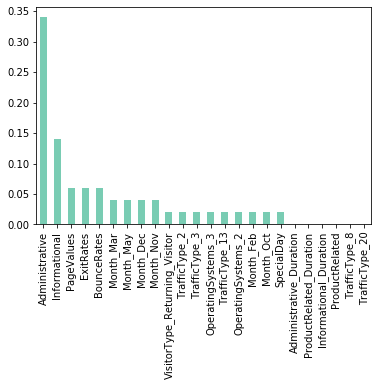

In [93]:
feat_importances = pd.Series(importances, index=feature_names)   #Get feature importances with indexes as feat_importances
feat_importances.nlargest(24).plot(kind='bar',color = '#79CCB3') #Plot 24 features' importances as bar chart

##### Adaboost Hyperparameter Tuning

In [94]:
ab_params = {'n_estimators': [10,80,200,800,2000,5000],  #The maximum number of estimators at which boosting is terminated
            'learning_rate':[0.01,0.1,0.5,1]}            #Weight applied to each classifier at each boosting iteration

In [95]:
ab = AdaBoostClassifier()

ab_cv_model = GridSearchCV(ab,           #Applying cross validation to the model
                           ab_params,    #Search best result in given parameters
                           cv = 10,      #Perform 10-Fold cross validation
                           n_jobs = -1,  #n_jobs = 1 means using all processors
                           verbose = 2)  #Controls the verbosity: the higher, the more messages

In [96]:
ab_cv_model.fit(X_train_res, y_train_res)  #Fit model with cross validation
ab_cv_model.best_params_                   #Show the best result on given parameters

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'learning_rate': 0.5, 'n_estimators': 5000}

In [97]:
#Tune the model with the best parameters
ab = AdaBoostClassifier(learning_rate = 0.5, 
                       n_estimators = 5000)


In [98]:
ab_tuned = ab.fit(X_train_res,y_train_res)  #Fit the model with best parameters
y_pred = ab_tuned.predict(X_test)           #Prediction according to tuned model
accuracy_score(y_test, y_pred)              #Accuracy score acording to tuned model

0.8773921505027571

### MODEL EVALUATIONS

Below are the results after model hyperparameter tuning processes are applied.
LightGBM(89.65%) has the best accuracy score by a small margin, followed by AdaBoost(87.74) and Random Forest(87.64).
Given its recall values, RF(79.96%) predicts by far the best, followed by AdaBoost(65.03%) and LightGBM(60.33%).
Given the precision values, LightGBM(70.24%) estimates by far the best, followed by AdaBoost(60.57%) and RF(58.01%).
Considering the F1 score of models, RF(67.24%) has the best result, followed by LightGBM(64.91%) and AdaBoost(62.72%).
Considering the ROC Curve of models, RF(93%) and LightGBM(93%) have the best result, followed by AdaBoost(90%).

#### Results for Tuned Values of Accuracy - Recall - Precision - F1 Score

In [99]:
#Thanks to for loop, tuned model results are compared 

models = [rf_tuned,lgbm_tuned,ab_tuned]                    #Tuned models
for model in models:
    names = model.__class__.__name__                       #Get the model's real name
    y_pred = model.predict(X_test)                         #Predict y according to X_test
    accuracy = accuracy_score(y_test, y_pred)              #Calculation of accuracy score for y_test and y_pred
    recall = recall_score(y_test,y_pred)                   #Calculation of recall score for y_test and y_pred
    precision = precision_score(y_test,y_pred)             #Calculation of precision score for y_test and y_pred
    f1_score = 2*(recall*precision) / (recall + precision) #Calculation of f1 score according to formulation which consists of recall and precision
    
    print("-"*28)                                          #Create a line with -
    print(names + ":" )                                    #Print model name
    print("-"*28)                                          #Create a line with -
    print("\nAccuracy: {:.4%}".format(accuracy))           #Print Accuracy Score: accuracy_score
    print('\n','Recall : '+str(recall))                    #Print Recall Score: recall_score
    print('\n','Precision : '+str(precision))              #Print Precision Score: precision_score
    print('\n','F1 Score : '+str(f1_score))                #Print F1 Score: f1_score

----------------------------
RandomForestClassifier:
----------------------------

Accuracy: 87.7068%

 Recall : 0.8016359918200409

 Precision : 0.5816023738872403

 F1 Score : 0.6741186586414445
----------------------------
LGBMClassifier:
----------------------------

Accuracy: 89.6529%

 Recall : 0.6032719836400818

 Precision : 0.7023809523809523

 F1 Score : 0.6490649064906491
----------------------------
AdaBoostClassifier:
----------------------------

Accuracy: 87.7392%

 Recall : 0.6503067484662577

 Precision : 0.6057142857142858

 F1 Score : 0.6272189349112427


##### Accuracy

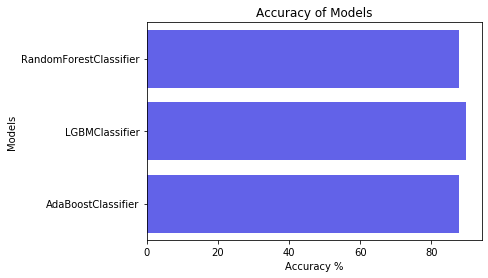

In [100]:
result = []   #Create an empty list

results = pd.DataFrame(columns= ["Models","Accuracy"])  #Make the columns of the results list Models and Accuracy

for model in models:
    names = model.__class__.__name__                                              #Assign the model's real name to names
    y_pred = model.predict(X_test)                                                #Predict y according to X_test
    accuracy = accuracy_score(y_test, y_pred)                                     #Calculate accuracy score for y_test and y_pred
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])#Assign model names and accuracy score to result
    results = results.append(result)                                              #Add result to results 


sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b", alpha = 0.7)    #Show comparison of accuracy scores for models on bar graph
plt.xlabel('Accuracy %')                                                          #The heading of the x-axis is Accuracy %.
plt.title('Accuracy of Models');                                                  #The heading of graph is Accuracy of Models

##### Recall

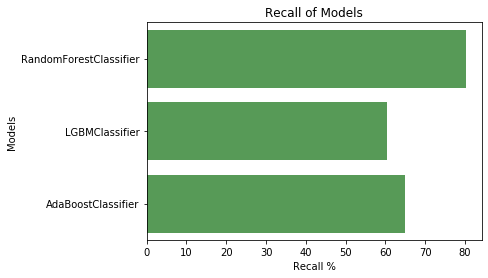

In [101]:
result = []   #Create an empty list

results = pd.DataFrame(columns= ["Models","Recall"])  #Make the columns of the results list Models and Recall

for model in models:
    names = model.__class__.__name__                                          #Assign the model's real name to names
    y_pred = model.predict(X_test)                                            #Predict y according to X_test
    recall = recall_score(y_test, y_pred)                                     #Calculate recall score for y_test and y_pred
    result = pd.DataFrame([[names, recall*100]], columns= ["Models","Recall"])#Assign model names and recall score to result
    results = results.append(result)                                          #Add result to results


sns.barplot(x= 'Recall', y = 'Models', data=results, color="g", alpha = 0.7)  #Show comparison of recall scores for models on bar graph
plt.xlabel('Recall %')                                                        #The heading of the x-axis is Recall %.
plt.title('Recall of Models');                                                #The heading of graph is Recall of Models

##### Precision

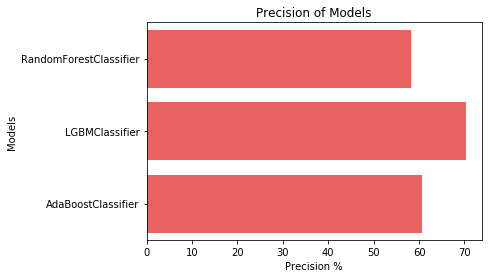

In [102]:
result = []   #Create an empty list

results = pd.DataFrame(columns= ["Models","Precision"])  #Make the columns of the results list Models and Precision

for model in models:
    names = model.__class__.__name__                                               #Assign the model's real name to names
    y_pred = model.predict(X_test)                                                 #Predict y according to X_test
    precision = precision_score(y_test, y_pred)                                    #Calculate precision score for y_test and y_pred
    result = pd.DataFrame([[names, precision*100]],columns= ["Models","Precision"])#Assign model names and precision score to result
    results = results.append(result)


sns.barplot(x= 'Precision', y = 'Models', data=results, color="r", alpha = 0.7)    #Show comparison of precision scores for models on bar graph
plt.xlabel('Precision %')                                                          #The heading of the x-axis is Precision %.
plt.title('Precision of Models');                                                  #The heading of graph is Precision of Models

##### F1 Score

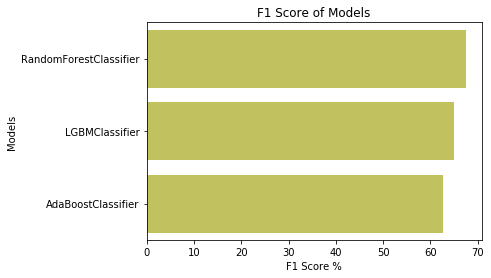

In [103]:
result = []   #Create an empty list

results = pd.DataFrame(columns= ["Models","F1 Score"])   #Make the columns of the results list Models and F1 Score

for model in models:
    names = model.__class__.__name__                                              #Assign the model's real name to names
    y_pred = model.predict(X_test)                                                #Predict y according to X_test
    recall = recall_score(y_test,y_pred)                                          #Calculate recall score for y_test and y_pred
    precision = precision_score(y_test,y_pred)                                    #Calculate precision score for y_test and y_pred
    f1_score = 2*(recall*precision) / (recall + precision)                        #Calculate f1 score according to recall and precision
    result = pd.DataFrame([[names, f1_score*100]], columns= ["Models","F1 Score"])#Assign model names and f1 score to result
    results = results.append(result)


sns.barplot(x= 'F1 Score', y = 'Models', data=results, color="y", alpha = 0.7)    #Show comparison of f1 scores for models on bar graph
plt.xlabel('F1 Score %')                                                          #The heading of the x-axis is F1 Score %.
plt.title('F1 Score of Models');                                                  #The heading of graph is F1 Score of Models

#### Results for Tuned Values of ROC Curves

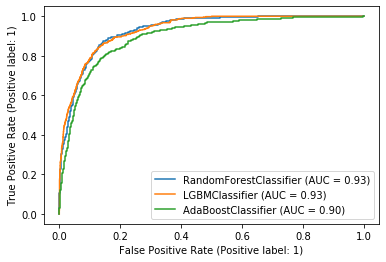

In [104]:
disp = plot_roc_curve(rf_tuned, X_test, y_test)           #Draw ROC Curve according to tuned Random Forest model
plot_roc_curve(lgbm_tuned, X_test, y_test, ax=disp.ax_);  #Draw ROC Curve according to tuned LightGBM model
plot_roc_curve(ab_tuned, X_test, y_test, ax=disp.ax_);    #Draw ROC Curve according to tuned AdaBoost model